In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
## defining keys

consumer_key = "peBfqUClppx3cyPqhilxqwh8F" 
consumer_secret = "GfikVkTashI0xEZxLGKIIo7TuSsMWEV5Cg7Vvmn6AMQnA2hT6G"
access_token = "1158430185516961793-Ze0zZjfJOcnd1YKTiMfCdqTrlKyhKM"
access_token_secret = "Pn0N3cn8CRysnl3dMeUgMknw2MkYPS74H8q6S4UTC4Leg"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
### collecting and cleaning 1000 tweets on covid

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Create a custom search term and define the number of tweets
search_term = "#covid19 OR #covid-19 OR covid-19 OR covid19 OR #coronavirus OR coronavirus OR #vaccine OR vaccine OR pandemic OR #pandemic -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]


In [4]:
len(tweets_no_urls)

1000

In [5]:
# Create textblob objects of the collected tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[1].polarity, sentiment_objects[1]

(0.0,
 TextBlob("TheRainbowStarBlogged QBOs Online Conference Empowers Startups In The Face Of COVID19"))

In [6]:
# Create list of polarity values and tweet texts
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[1]

[0.0,
 'TheRainbowStarBlogged QBOs Online Conference Empowers Startups In The Face Of COVID19']

In [7]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity_score", "tweet"])
pd.set_option('display.max_colwidth', 1000)
sentiment_df.head(10)

,polarity_score,tweet
0,0.000000,stuartrobertmp AnnastaciaMP Ummm are you actually in QldI was at Westfield North Lakes this afternoon and it
1,0.000000,TheRainbowStarBlogged QBOs Online Conference Empowers Startups In The Face Of COVID19
2,0.000000,The importance of PR in the time of the coronavirus pandemic covid19 mediarelations publicity storytelling
3,0.000000,COVID19 vaccine trial paused over amp39unexplained illnessamp39Source CBC News click here gt
4,0.000000,MarcusSimmons54 Oh No COVID19 change everything
5,-0.062500,This years Leeds German Christmas Market is cancelled due to uncertainty over Covid19 council confirms
6,0.000000,Coronavirus Video coming tommorow
7,-0.479167,Were in the midst of a major health crisis amp one of the worst recessions in historyIts questionable for gover
8,0.000000,Fatih2mars Effet Covid19
9,-0.050000,BBCLauraMac BBCRadioScot Billwhiteford Shame so many cancelling TV licence today Laura over dangerous decision t


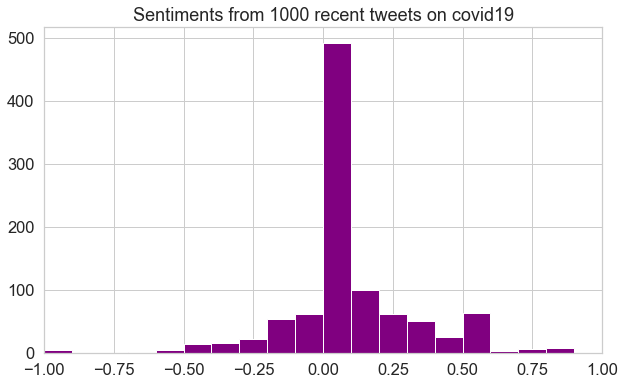

In [8]:
## Histogram of tweet sentiments

import numpy as np

bin_range = np.arange(-1, 1, 0.1)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=bin_range,
             ax=ax,
             color="purple")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid19")
plt.savefig("s_analysis.png")

plt.show()


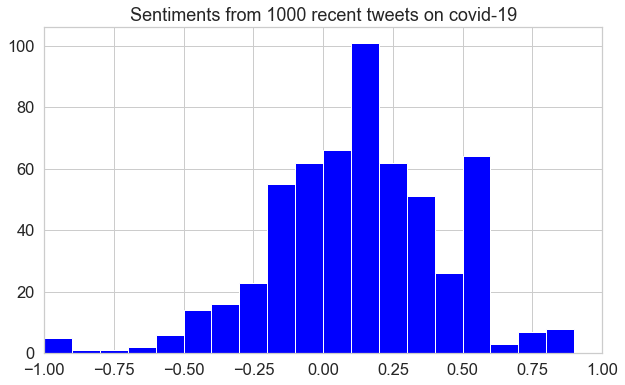

In [9]:
# Remove polarity values which equal to zero to get more valuable distribution

sentiment_df_nz = sentiment_df[sentiment_df.polarity_score != 0]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with break at zero
sentiment_df_nz.hist(bins=bin_range,
             ax=ax,
             color="blue")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid-19")
plt.show()

In [21]:
## 10 most positive tweets about covid-19

sentiment_df_nz_sorted = sentiment_df_nz.sort_values('polarity_score', ascending=False)

pd.set_option('display.max_colwidth', 500)

sentiment_df_nz_sorted.head(10)

,polarity_score,tweet
395,1.00,Remember PNPs are one of the best ways to obtain PR in CanadaDespite Canadas temporary travel restrictions s
596,0.85,We are so proud to introduce our charity for September Whoopsadaisy2 This incredible charity supports
925,0.80,Be brave and keep fighting against COVID19
436,0.80,This is a great example of the comprehensive job we can do for you here at Elygra Counter fronts Wall Art Poster
454,0.80,Yesterday was RUOK Day and this is a great example of how flexible working can contribute to improving your teams m
836,0.80,Great value PosterHolders pavement Aboards amp SignHolders for COVID19 security and safety messaging in your shop
272,0.80,Kipsigisgal Welcome to the sisterhood of vaccine lovers
198,0.80,We drove to Kamangu Witeithie to donate some water to the locals Women men and children alike greatly thanked u
319,0.80,A University Had a Great Coronavirus Plan but Students Partied OnTrump doesnt want them to worry party on
735,0.75,WHO lists Pakistan among 7 countries for successfully fighting coronavirus pandemic


In [22]:
## 10 most negative tweets about covid-19

sentiment_df_nz_sorted = sentiment_df_nz.sort_values('polarity_score', ascending=True)

pd.set_option('display.max_colwidth', 500)

sentiment_df_nz_sorted.head(10)

,polarity_score,tweet
429,-1.000,Lets mourn 911 It was a horrific tragedy We should NeverForgetBut when the mourning is over know that a 9
16,-1.000,GlasgowTimes Outrageous decision Why should those without internet or the means to watch the briefings lose out
876,-1.000,The MCO was especially difficult for the lowerincome groupCatch the exclusive docufilm Malaysia vs Covid19
582,-1.000,MigunaMiguna What mistaker u talking abouthe is a pandemic amp a terrible legacy calamitywhich Kenyanswill never never foget forever
552,-1.000,UN expert Pandemics worst impacts on poverty yet to come
573,-0.875,When you brutally beat protesting farmers or students protesting JEENEET exams in times of Coronavirus it is dem
106,-0.800,What I find incredibly stupid is that the mentioned tweet said below 30K but podcasts and discussion groups are so
267,-0.700,Anger in China as doctor who died of Covid19 omitted from citizen awards China The Guardian China
612,-0.700,LV11 Coronavirus in the US How Did the Pandemic Get So Bad Time
370,-0.600,COVID19 is cutting a jarring and unequal path across the US The disease is disproportionately killing people of


Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-8:
Traceback (most recent call last):
  File "c:\users\adars\appdata\local\programs\python\python37\lib\site-packages\anvil\server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "c:\users\adars\appdata\local\programs\python\python37\lib\site-packages\anvil\server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "c:\users\adars\appdata\local\programs\python\python37\lib\site-packages\anvil\_threaded_server.py", line 402, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\adars\appdata\local\programs\python\python37\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "c:\users\adars\appdata\local\programs\python\python37\lib\thr

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [12]:
user = api.user_timeline('otvnews' , count = 10)
data = [remove_url(tweet.text) for tweet in user]
frame = pd.DataFrame(data , columns = ["tweets"])
pd.set_option('display.max_colwidth', 1000)
frame.head(10)

,tweets
0,Odisha Matric Supplementary Exam From September 14 Check All Details
1,Bhubaneswar Nandankanan Zoological Park likely to open in October a special SOP adhering to the COVID19 guideli
2,NEET2020 Tomorrow Preparations Reach Last Stage Odisha
3,Bhubaneswar Municipal Corporation decides to close Unit1 market on September 13 to avoid excess crowding during NE
4,BPUT decides to hold intermediate semester exam online BTech BPharma MBA MCA second semester exam to be held in September Odisha
5,Balu Bazaar Puja Committee moves the Orissa High Court challenging the puja guidelines issued by Odisha govt file
6,Supreme Court issues notice to Odisha along with three other States seeking reply over nonimplementation of Ayush
7,Mumbai Court Rejects RheaChakraborthys Bail Plea
8,Odisha Chief Secretary reviews COVID19 situation in Balasore says a new 100bed hospital with ICU and OT will be
9,Drug Link Mumbai special court rejects bail pleas Rhea Chakraborty her brother Showik Chakraborty and four others


In [13]:
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(500)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [14]:
## Creating dataframe of handles and user-defined locations

users_locs_df = pd.DataFrame(data=users_locs, columns=('users', 'locations'))
users_locs_df.head(20)

,users,locations
0,TraderStef,Live Free or Die - NH USA
1,mswelispha,"Tembisa, South Africa"
2,mmyer1018,Michigander
3,Fugazi140,Liverpool.
4,BpoolCouncil,Blackpool
5,BpoolCouncil,Blackpool
6,ProspectwalesTU,Cardiff
7,ninarosenwald,"New York, NY"
8,IshieldIndia,
9,unclenonotouch,Seattle


In [15]:
## Replacing blanks with NaN vals

users_locs_df = users_locs_df.replace('',np.nan)
users_locs_df.head(20)
## Dropping NaN rows

users_locs_df = users_locs_df.dropna()
users_locs_df.head(20)

,users,locations
0,TraderStef,Live Free or Die - NH USA
1,mswelispha,"Tembisa, South Africa"
2,mmyer1018,Michigander
3,Fugazi140,Liverpool.
4,BpoolCouncil,Blackpool
5,BpoolCouncil,Blackpool
6,ProspectwalesTU,Cardiff
7,ninarosenwald,"New York, NY"
9,unclenonotouch,Seattle
10,___fire_fly___,"Cochin, India"


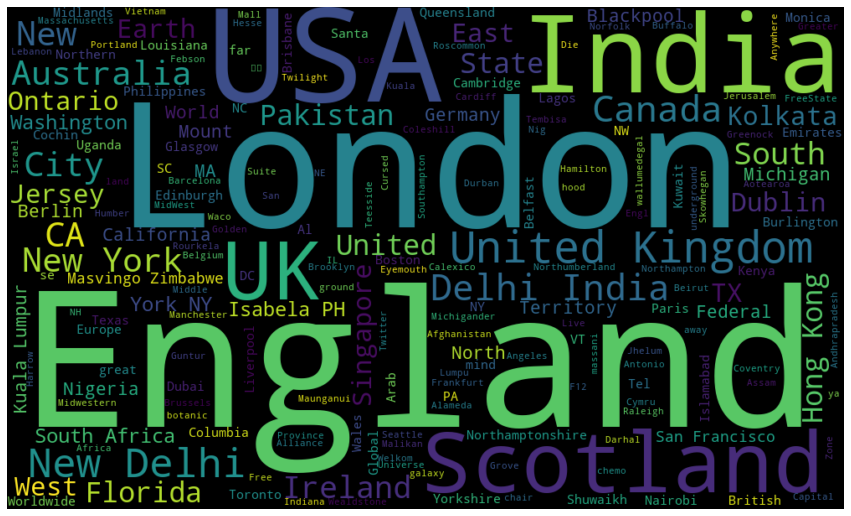

In [16]:
## turning list of locs into one big string and visualising location counts as WordCloud

all_locs_string = ' '.join(users_locs_df['locations'].tolist())

from wordcloud import WordCloud

word_cloud = WordCloud(width=1000, height=600).generate(all_locs_string)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("wordcloud.png")